<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab on practical descent methods </h2></center>


---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# Algorithms performance on practical problems

In this lab, we will investigate how to evaluate and display performance of optimization algorithms over a practical problem of machine learning: binary classification using logistic regression.</br>


### Influence of strong convexity on the speed of the gradient method


> The file `logistic_regression_ionosphere.ipynb` contains the simulators for the loss function. 

> Run the following two blocks for different values of parameter `lam` of the problem. What do you notice in terms of speed of convergence, what is the reason?



In [13]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import logistic_regression_ionosphere as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 5000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L
print("lam = ",pb.lam)

##### gradient algorithm
x,x_tab = gradient_algorithm(pb.f , pb.f_grad , x0 , step , PREC , ITE_MAX )



importing notebook from algoGradient.ipynb
importing notebook from logistic_regression_ionosphere.ipynb
lam =  0.001
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.0298918139177214
FINISHED -- 4999 iterations / 11.927539s -- final value: 0.199636




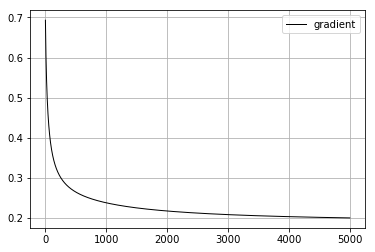

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append( pb.f(x_tab[i])) 


plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-",label='gradient')
plt.grid(True)
plt.legend()
plt.show()


# Accelerating poorly conditioned problems

While the addition of strong convexity accelerates the rate in practice, it usually result shift the solutions of the original problem. For a learning problem, it affects the accuracy.

In order to get faster convergences when the rate is slower, several acceleration techniques exist. We are going to present the most common in the following.

### Nesterov's fast gradient

> Take a look at the definition of *Nesterov's fast gradient algorithm* in Section 1.d of file `algoGradient.ipynb` and implement it.

> Run the constant stepsize and fast gradient algorithms and compare the convergence rates (for lam = 0.001).

In [16]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import logistic_regression_ionosphere as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 5000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = gradient_algorithm(pb.f , pb.f_grad , x0 , step , PREC , ITE_MAX )

##### fast gradient algorithm
xF,xF_tab  = fast_gradient_algorithm(pb.f , pb.f_grad , x0 , step , PREC , ITE_MAX )

importing notebook from algoGradient.ipynb
importing notebook from logistic_regression_ionosphere.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.0298918139177214
FINISHED -- 4999 iterations / 12.207763s -- final value: 0.199636


------------------------------------
 Fast gradient
------------------------------------
START    -- stepsize = 0.0298918139177214
FINISHED -- 4999 iterations / 12.202058s -- final value: 0.190726




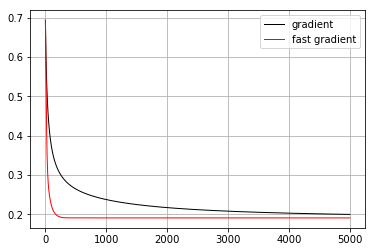

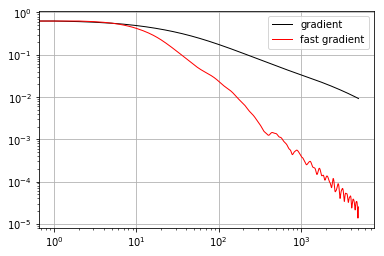

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
G = []
for i in range(x_tab.shape[0]):
    F.append( pb.f(x_tab[i])) 
    G.append( np.linalg.norm(pb.f_grad(x_tab[i] )) )

FF = []
GF = []
for i in range(xF_tab.shape[0]):
    FF.append( pb.f(xF_tab[i])) 
    GF.append( np.linalg.norm(pb.f_grad(xF_tab[i] )) )

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-",label='gradient')
plt.plot( FF, color="red", linewidth=1.0, linestyle="-",label='fast gradient')
plt.grid(True)
plt.legend()
plt.show()


plt.figure()
plt.plot( G, color="black", linewidth=1.0, linestyle="-",label='gradient')
plt.plot( GF, color="red", linewidth=1.0, linestyle="-",label='fast gradient')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


---


### Other methods: line-search, BFGS


Other popular methods to accelerate convergence are:
* line-search (as seen quickly in the previous lab, it is implemented in 1.c of file `algoGradient.ipynb` )
* BFGS which is a Quasi-Newton method in the sense that it approximates second order information in an online setting. 

> Implement BFGS in Section 3 of  file `algoGradient.ipynb` .

> Compare the performance of the previously investigated algorithms. *(Note that you can also test the performance of Newton's method although it is a bit unfair compared to the other algorithms as the variable size is small)*

In [ ]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import numpy as np
import logistic_regression_ionosphere as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = gradient_algorithm(pb.f , pb.f_grad , x0 , step , PREC , ITE_MAX )

##### fast gradient algorithm
xF,xF_tab  = fast_gradient_algorithm(pb.f , pb.f_grad , x0 , step , PREC , ITE_MAX )

##### Wolfe line-search algorithm
xW,xW_tab = gradient_Wolfe(pb.f , pb.f_grad , x0 , PREC , ITE_MAX )

##### BFGS algorithm
xB,xB_tab = bfgs(pb.f , pb.f_grad , x0 , PREC , ITE_MAX )


In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
G = []
for i in range(x_tab.shape[0]):
    F.append( pb.f(x_tab[i])) 
    G.append( np.linalg.norm(pb.f_grad(x_tab[i] )) )

FF = []
GF = []
for i in range(xF_tab.shape[0]):
    FF.append( pb.f(xF_tab[i])) 
    GF.append( np.linalg.norm(pb.f_grad(xF_tab[i] )) )
    
FW = []
GW = []
for i in range(xW_tab.shape[0]):
    FW.append( pb.f(xW_tab[i])) 
    GW.append( np.linalg.norm(pb.f_grad(xW_tab[i] )) )
    
    
FB = []
GB = []
for i in range(xB_tab.shape[0]):
    FB.append( pb.f(xB_tab[i])) 
    GB.append( np.linalg.norm(pb.f_grad(xB_tab[i] )) )

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-",label='gradient')
plt.plot( FF, color="red", linewidth=1.0, linestyle="-",label='fast gradient')
plt.plot( FW, color="magenta", linewidth=1.0, linestyle="-",label='Wolfe')
plt.plot( FB, color="green", linewidth=1.0, linestyle="-",label='BFGS')
plt.grid(True)
plt.legend()
plt.show()


plt.figure()
plt.plot( G, color="black", linewidth=1.0, linestyle="-",label='gradient')
plt.plot( GF, color="red", linewidth=1.0, linestyle="-",label='fast gradient')
plt.plot( GW, color="magenta", linewidth=1.0, linestyle="-",label='Wolfe')
plt.plot( GB, color="green", linewidth=1.0, linestyle="-",label='BFGS')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


---

# Performance on learning problems

### Prediction power



Our problem of interest is binary classification using logistic regression.</br>
Although this is a machine learning task, the predictor construction amounts to minimizing a smooth convex optimization function $f$ called the *loss*, the final minimizer is called a *predictor* and its scalar product with the data vector gives a probability of belonging to class $1$.

The previous test was based on the functional decrease whereas our task is binary classification. Let us look at the final accuracies obtained.

> The file `logistic_regression.ipynb` also contains a `prediction` function that takes a *predictor* and resturn the accuracy of the predictor. Take a look at how the function is defined.

> Observe the accuracy of all final points obtained before. What do you notice? 

In [ ]:
pred,perf = pb.prediction(x,PRINT=False)
print("Gradient algorithm: \t{:.2f}%".format(perf*100))

predF,perfF = pb.prediction(xF,PRINT=False)
print("Fast Gradient: \t\t{:.2f}%".format(perfF*100))

predW,perfW = pb.prediction(xW,PRINT=False)
print("Wolfe: \t\t\t{:.2f}%".format(perfW*100))

predB,perfB = pb.prediction(xB,PRINT=False)
print("BFGS: \t\t\t{:.2f}%".format(perfB*100))

In [ ]:
predF,perfF = pb.prediction(xF,PRINT=True)